In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression


## Check if cross validation parameter range is proper

In [23]:
exp = glob.glob("./../../ordinal_regression/orca/src/Experiments/svorLin/*/Results")
C_dict = {}
for e in exp:
    data = glob.glob(e + "/*/*test*")
    for d in data:

        # print(d)
        df = pd.read_csv(d)
        # print(df.C)
        for c in df.C:
            if c not in C_dict.keys():
                C_dict[c]=1
            else:
                C_dict[c]+=1
print(C_dict)

{}


In [25]:
exp = glob.glob("./../../ordinal_regression/orca/src/Experiments/svorim/*/Results")
C_dict = {}
k_dict = {}
for e in exp:
    data = glob.glob(e + "/*/*test*")
    for d in data:
        # print(d)
        df = pd.read_csv(d)
        # print(df.C)
        for c in df.C:
            if c not in C_dict.keys():
                C_dict[c]=1
            else:
                C_dict[c]+=1

        for k in df.k:
            if k not in k_dict.keys():
                k_dict[k]=1
            else:
                k_dict[k]+=1
print(C_dict)
print(k_dict)

{1.0: 43, 100.0: 4, 1000.0: 29, 10.0: 14}
{0.1: 54, 0.001: 27, 0.01: 9}


## check the predictive performance

In [3]:
methodname = "svorLin"
exp = glob.glob(f"./../../ordinal_regression/orca/src/Experiments/{methodname}/*/Results")
metrix_list = []
for e in exp:
    data = glob.glob(e + "/*/*test*")
    for d in data:
        # print(d)
        df = pd.read_csv(d)
        # print(df.C)
        if d.split("/")[-2].split("-")[0] in ["winequality", "squash"]:
            t = d.split("/")[-2].split("-")[1]
            if t not in ["pom","svorim"]:
                dataname = f'{d.split("/")[-2].split("-")[0]}-{t}_{e.split("/")[-2]}'
            else:
                dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        else:
            dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        metrix_list.append([dataname,df.TrainTime.mean(),df.Acc.mean()/100, df.MAE.mean()])
method_df = pd.DataFrame(metrix_list, columns = ["dataname","time","acc", "mae"])
method_df.to_csv(f"result_files/predictive_performace/{methodname}_metrix.csv")
all_df = method_df.copy(deep=True)
all_df.rename(columns=lambda c:f"{methodname}_"+c if c!="dataname" else c , inplace=True)

In [4]:
methodname = "svorim"
exp = glob.glob(f"./../../ordinal_regression/orca/src/Experiments/{methodname}/*/Results")
metrix_list = []
for e in exp:
    data = glob.glob(e + "/*/*test*")
    for d in data:
        # print(d)
        df = pd.read_csv(d)
        # print(df.C)
        if d.split("/")[-2].split("-")[0] in ["winequality", "squash"]:
            t = d.split("/")[-2].split("-")[1]
            if t not in ["pom","svorim"]:
                dataname = f'{d.split("/")[-2].split("-")[0]}-{t}_{e.split("/")[-2]}'
            else:
                dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        else:
            dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        metrix_list.append([dataname,df.TrainTime.mean(),df.Acc.mean()/100, df.MAE.mean()])
method_df = pd.DataFrame(metrix_list, columns = ["dataname","time","acc", "mae"])
method_df.to_csv(f"result_files/predictive_performace/{methodname}_metrix.csv")
method_df.rename(columns=lambda c:f"{methodname}_"+c if c!="dataname" else c , inplace=True)
all_df = pd.merge(all_df, method_df, how="outer", on="dataname")

In [5]:
methodname = "clm"
exp = glob.glob(f"./../../ordinal_regression/orca/src/Experiments/{methodname}/*/Results")
metrix_list = []
for e in exp:
    data = glob.glob(e + "/*/*test*")
    for d in data:
        # print(d)
        df = pd.read_csv(d)
        # print(df.C)
        if d.split("/")[-2].split("-")[0] in ["winequality", "squash"]:
            t = d.split("/")[-2].split("-")[1]
            if t not in ["pom","svorim"]:
                dataname = f'{d.split("/")[-2].split("-")[0]}-{t}_{e.split("/")[-2]}'
            else:
                dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        else:
            dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        metrix_list.append([dataname,df.TrainTime.mean(),df.Acc.mean()/100, df.MAE.mean()])
method_df = pd.DataFrame(metrix_list, columns = ["dataname","time","acc", "mae"])
method_df.to_csv(f"result_files/predictive_performace/{methodname}_metrix.csv")
method_df.rename(columns=lambda c:f"{methodname}_"+c if c!="dataname" else c , inplace=True)
all_df = pd.merge(all_df, method_df, how="outer", on="dataname")
all_df


,dataname,svorLin_time,svorLin_acc,svorLin_mae,svorim_time,svorim_acc,svorim_mae,clm_time,clm_acc,clm_mae
0,ERA_or,93.151054,0.244533,1.214533,20.012287,0.245867,1.215733,0.116681,0.275200,1.237067
1,ESL_or,19.471685,0.705738,0.310383,0.437485,0.714208,0.301093,0.041128,0.706011,0.309563
2,LEV_or,513.317179,0.620667,0.412267,4.900618,0.623467,0.412267,0.046539,0.621867,0.411200
3,SWD_or,46.063415,0.566400,0.451200,2.577331,0.570667,0.444667,0.052957,0.569733,0.451600
4,automobile_or,0.166335,0.603846,0.457051,0.292367,0.669872,0.397436,0.457718,0.564103,0.598077
5,balance_or,0.117075,0.904883,0.107856,0.441552,0.997665,0.002335,0.031923,0.903822,0.109766
6,bondrate_or,0.017926,0.551111,0.588889,0.010332,0.528889,0.617778,0.125739,0.328889,0.931111
7,car_or,9.739151,0.923457,0.077238,3.163183,0.987191,0.012809,1.084476,0.921219,0.079938
8,contact_or,0.017470,0.655556,0.433333,0.007259,0.622222,0.488889,0.074436,0.611111,0.544444
9,eucalyptus_or,19.060297,0.641486,0.386051,0.527264,0.642391,0.391304,4.119229,0.217029,1.869565


In [6]:
path = glob.glob("./../tvaclm_exp3/*/*.csv")
path += glob.glob("./../tvaclm_exp3/*/*/*.csv")
dirtotype = {"5bins":"5bins", "10bins":"10bins", "ordinal-regression":"or", "bigdata":"bd"}
metrix_list = []
for p in path:
    df = pd.read_csv(p)
    if "winequality"in p.split("/")[-1].split(".")[0] or "squash" in p.split("/")[-1].split(".")[0]:
        dataname = p.split("/")[-1].split(".")[0] + "_" + dirtotype[p.split("/")[-2]]
    else:
        dataname = p.split("/")[-1].split(".")[0].split("-")[0] + "_" + dirtotype[p.split("/")[-2]]
    metrix_list.append([dataname,df.duration.mean(),df.acc.mean(), df.mae.mean()])

tvaclm_df = pd.DataFrame(metrix_list, columns = ["dataname", "time","acc", "mae"])
tvaclm_df.to_csv("result_files/predictive_performace/tvaclm_metrix.csv")
all_df = pd.merge(all_df, tvaclm_df, how="outer", on="dataname")

In [7]:
time_df = all_df[['dataname'] + [c for c in all_df.columns if ("time" in c)]]
time_df.to_csv("result_files/predictive_performace/time.csv")

In [8]:
acc_df = all_df[['dataname'] + [c for c in all_df.columns if ("acc" in c)]]
acc_df.to_csv("result_files/predictive_performace/acc.csv")

In [9]:
mae_df = all_df[['dataname'] + [c for c in all_df.columns if ("mae" in c)]]
mae_df.to_csv("result_files/predictive_performace/mae.csv")

In [10]:
path = glob.glob("./../../ordinal_regression/orca/datasets2/*/*/matlab/train_*.1")
path += glob.glob("./../../ordinal_regression/orca/datasets2/*/*/*/matlab/train_*.1")
dirtotype = {"5bins":"5bins", "10bins":"10bins", "ordinal-regression":"or", "bigdata":"bd"}
size_list = []
for p in path:
    if "bigdata" not in p and  "discretized-regression" not in p and  "ordinal-regression" not in p:
        continue
    df = pd.read_csv(p, delimiter=" ", header=None)
    orig_dataname = p.split("/")[-3]
    if "winequality"in orig_dataname or "squash" in orig_dataname:
        dataname = orig_dataname + "_" + dirtotype[p.split("/")[-4]]
    else:
        dataname = orig_dataname.split("-")[0] + "_" + dirtotype[p.split("/")[-4]]
    size_list.append([dataname,len(df), len(df.columns)-1, df.iloc[:,-1].max()])

size_df = pd.DataFrame(size_list, columns = ["dataname", "n", "d", "Q"])
size_df.to_csv("result_files/predictive_performace/data_n.csv")
all_df = pd.merge(all_df, size_df, how="outer", on="dataname")

In [11]:
def rename_data(x):
    d = x.split("_")[0]
    category = x.split("_")[1]
    if category=="or" or category=="bd":
        if d=="contact":
            d = "contact-lenses"
        if d=="balance":
            d = "balance-scale"
        return d
    else:
        d = ''.join([i for i in d if not i.isdigit()])
        if category=="5bins":
            return d + "-5"

        if category=="10bins":
            return d + "-10"
            
all_df["dataname"] = all_df["dataname"].map(rename_data)

/home/iyori/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/iyori/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/iyori/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return

done
done
done
done


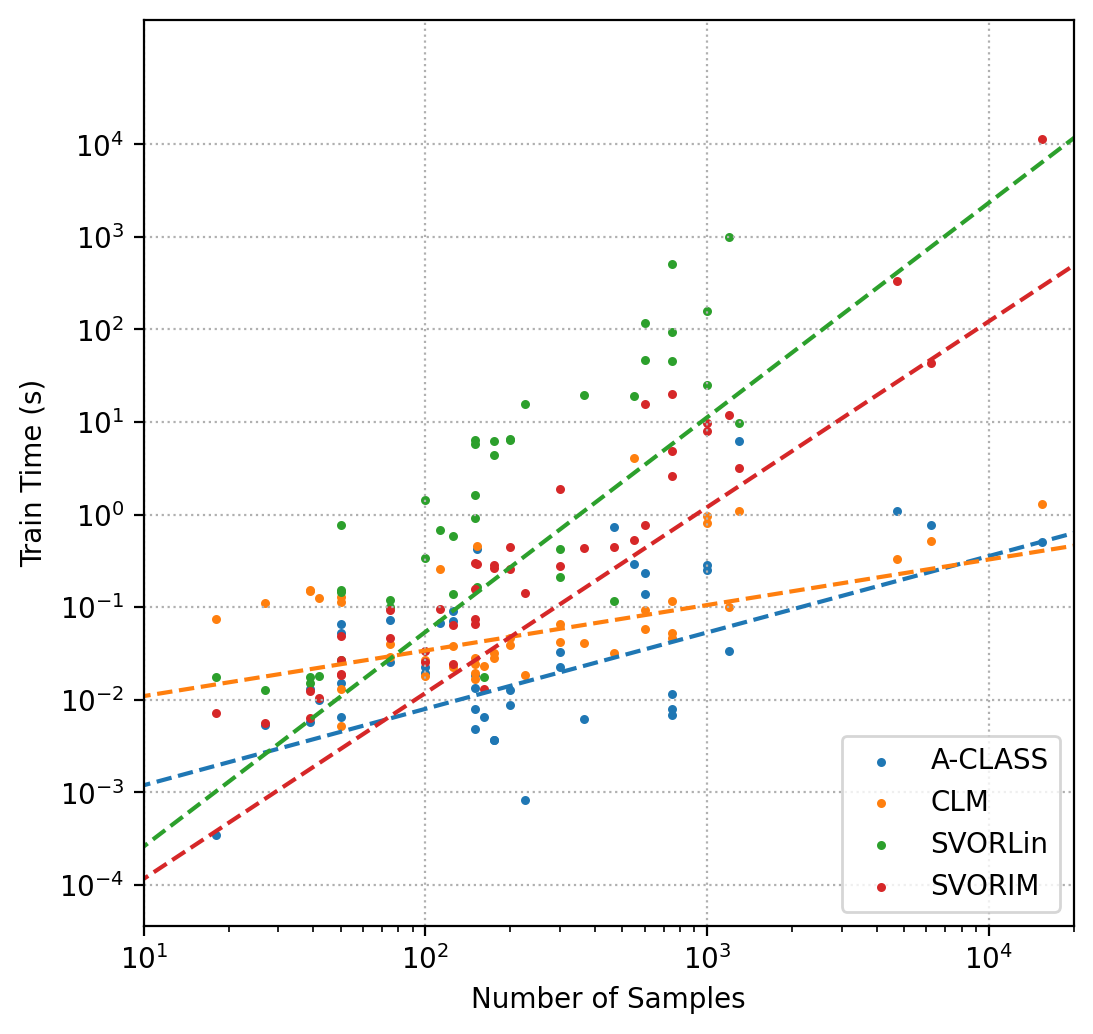

In [17]:

plt.figure(figsize=(6, 6), dpi=200, facecolor="white")
time_list = [('time', 'A-CLASS'),('clm_time',"CLM"),('svorLin_time', "SVORLin"),('svorim_time', "SVORIM") ]
n_array = np.array(all_df.n)
x = np.log(n_array[:,np.newaxis])
for t in time_list:
    df = all_df[['n',t[0]]]
    df.dropna(axis=0, inplace=True)
    plt.scatter(df['n'],df[t[0]] , s=5, marker='o', label=t[1])
    log_t = np.log(df[t[0]])
    log_x = np.log(df[['n']])
    model_lr = LinearRegression()
    model_lr.fit(log_x, log_t)
    toy = np.arange(1.4,10,0.1)
    plt.plot(np.exp(toy) * (np.log(10)), np.exp(model_lr.predict(toy[:,np.newaxis])),ls="dashed")
    print("done")

plt.legend(loc='lower right')
plt.xscale('log')
plt.yscale('log')
plt.yticks([1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4])
plt.xlim(10,20000)
plt.xlabel("Number of Samples")
plt.ylabel("Train Time (s)")
plt.grid( linestyle='dotted')
plt.savefig("figs/n_vs_t.png")

In [12]:
path = glob.glob("./../tvaclm_exp/*/*.csv")
path += glob.glob("./../tvaclm_exp/*/*/*.csv")
dirtotype = {"5bins":"5bins", "10bins":"10bins", "ordinal-regression":"or", "bigdata":"bd"}
metrix_list = []
for p in path:
    if "check_f" in p or "scale" in p:
        continue
    df = pd.read_csv(p)
    if "winequality"in p.split("/")[-1].split(".")[0] or "squash" in p.split("/")[-1].split(".")[0]:
        dataname = p.split("/")[-1].split(".")[0] + "_" + dirtotype[p.split("/")[-2]]
    else:
        dataname = p.split("/")[-1].split(".")[0].split("-")[0] + "_" + dirtotype[p.split("/")[-2]]
 
    metrix_list.append([dataname,df.duration.mean(),df.acc.mean(), df.mae.mean()])

tvaclm_df = pd.DataFrame(metrix_list, columns = ["dataname", "time","acc", "mae"])
# tvaclm_df.to_csv("result_files/predictive_performace/tvaclm_metrix.csv")
# all_df = pd.merge(all_df, tvaclm_df, how="outer", on="dataname")
tvaclm_df.mean()

<ipython-input-12-b6e1d28500d9>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tvaclm_df.mean()


time    0.326520
acc     0.519908
mae     0.691715
dtype: float64

In [11]:
path = glob.glob("./../tvaclm_exp3/*/*.csv")
path += glob.glob("./../tvaclm_exp3/*/*/*.csv")
dirtotype = {"5bins":"5bins", "10bins":"10bins", "ordinal-regression":"or", "bigdata":"bd"}
metrix_list = []
for p in path:
    if "check_f" in p or "scale" in p:
        continue
    df = pd.read_csv(p)
    if "winequality"in p.split("/")[-1].split(".")[0] or "squash" in p.split("/")[-1].split(".")[0]:
        dataname = p.split("/")[-1].split(".")[0] + "_" + dirtotype[p.split("/")[-2]]
    else:
        dataname = p.split("/")[-1].split(".")[0].split("-")[0] + "_" + dirtotype[p.split("/")[-2]]
 
    metrix_list.append([dataname,df.duration.mean(),df.acc.mean(), df.mae.mean()])

tvaclm_df = pd.DataFrame(metrix_list, columns = ["dataname", "time","acc", "mae"])
# tvaclm_df.to_csv("result_files/predictive_performace/tvaclm_metrix.csv")
# all_df = pd.merge(all_df, tvaclm_df, how="outer", on="dataname")
tvaclm_df.mean()

<ipython-input-11-d584fe3721e1>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tvaclm_df.mean()


time    0.253871
acc     0.520190
mae     0.691178
dtype: float64

In [16]:

print(all_df[["dataname","n","d","Q","time","clm_time","svorLin_time","svorim_time"]].to_latex(index=False,float_format="%.3f"))

\begin{tabular}{lrrrrrrr}
\toprule
         dataname &     n &  d &  Q &  time &  clm\_time &  svorLin\_time &  svorim\_time \\
\midrule
              ERA &   750 &  4 &  9 & 0.008 &     0.117 &        93.151 &       20.012 \\
              ESL &   366 &  4 &  9 & 0.006 &     0.041 &        19.472 &        0.437 \\
              LEV &   750 &  4 &  5 & 0.007 &     0.047 &       513.317 &        4.901 \\
              SWD &   750 & 10 &  4 & 0.011 &     0.053 &        46.063 &        2.577 \\
       automobile &   153 & 71 &  6 & 0.422 &     0.458 &         0.166 &        0.292 \\
    balance-scale &   468 &  4 &  3 & 0.728 &     0.032 &         0.117 &        0.442 \\
         bondrate &    42 & 37 &  5 & 0.010 &     0.126 &         0.018 &        0.010 \\
              car &  1296 & 21 &  4 & 6.170 &     1.084 &         9.739 &        3.163 \\
   contact-lenses &    18 &  6 &  3 & 0.000 &     0.074 &         0.017 &        0.007 \\
       eucalyptus &   552 & 91 &  5 & 0.289 &     4.1

In [53]:
# "acc","clm_acc","svorLin_acc","svorim_acc"
metric = all_df.dropna()
# (metric[metric["n"]>=300]).mean()[]
metric.mean()

<ipython-input-53-ea2f395a18f7>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metric.mean()


svorLin_time     51.565949
svorLin_acc       0.521202
svorLin_mae       0.682255
svorim_time       2.022030
svorim_acc        0.561839
svorim_mae        0.620881
clm_time          0.236049
clm_acc           0.491796
clm_mae           0.790667
time              0.225992
acc               0.534044
mae               0.678328
n               314.585366
d                19.268293
Q                 6.317073
dtype: float64

In [50]:
methodname = "svorim"
exp = glob.glob(f"./../../ordinal_regression/orca/src/Experiments/{methodname}/*/Results")
metrix_list = []
for e in exp:
    data = glob.glob(e + "/*/*test*")
    for d in data:
        # print(d)
        df = pd.read_csv(d)
        # print(df.C)
        if d.split("/")[-2].split("-")[0] in ["winequality", "squash"]:
            t = d.split("/")[-2].split("-")[1]
            if t not in ["pom","svorim"]:
                dataname = f'{d.split("/")[-2].split("-")[0]}-{t}_{e.split("/")[-2]}'
            else:
                dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        else:
            dataname = f'{d.split("/")[-2].split("-")[0]}_{e.split("/")[-2]}'
        metrix_list.append([dataname,df.TrainTime.mean(),df.Acc.mean()/100, df.MAE.mean(), df.C.median(), df.k.median()])
method_df = pd.DataFrame(metrix_list, columns = ["dataname","time","acc", "mae", "C", "k"])
# method_df.to_csv(f"result_files/predictive_performace/{methodname}_metrix.csv")
# method_df.rename(columns=lambda c:f"{methodname}_"+c if c!="dataname" else c , inplace=True)
# all_df = pd.merge(all_df, method_df, how="outer", on="dataname")
method_df

,dataname,time,acc,mae,C,k
0,wlb_bd,11416.754232,0.311938,0.965129,1000.0,0.0010
1,winequality_bd,43.187480,0.576500,0.462335,1.0,0.1000
2,winequality-white_bd,336.833019,0.548259,0.496300,1000.0,0.0010
3,abalone10_10bins,9.690549,0.271199,1.360686,100.0,0.0100
4,bank1_10bins,0.049201,0.503936,0.576480,100.0,0.0100
5,bank2_10bins,0.093792,0.178890,1.882863,10.0,0.0010
6,calhousing_10bins,0.300851,0.290271,1.248594,100.0,0.0100
7,census1_10bins,0.287132,0.243828,1.509633,55.0,0.0100
8,census2_10bins,0.441555,0.238215,1.511468,10.0,0.0100
9,computer1_10bins,0.025384,0.396422,0.905437,10.0,0.0100
